<a href="https://colab.research.google.com/github/MarcoParola/medical_images_classification/blob/main/Scratch_CNN_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import collections 
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from sklearn import metrics 

In [ ]:
projectPath = 'drive/MyDrive/Colab Notebooks/cidl/'
dataPath = 'numpy data/'

In [ ]:
%cd $projectPath
%run utils.ipynb
%cd '../../../..'

/content/drive/MyDrive/Colab Notebooks/cidl
/content


In [ ]:
# load data
imagesTrainPub, labelsTrainPub, imagesTestPub, labelsTestPub, imagesTestPriv = load_data(projectPath + dataPath)

# normalize data 
imagesTrainPub = scaleData(imagesTrainPub)
imagesTestPub = scaleData(imagesTestPub)

In [ ]:
# create (if not exists) the folder to store the models
dir_name = 'models/task2_1/'
if not os.path.exists(projectPath + dir_name):
  os.makedirs(projectPath + dir_name)

In [ ]:
np.random.seed(33)

# **Task 2**

## 2.1 Binary classification: Mass and Calcification
Classes:
*   Mass 1218
*   Calcification 1458

In [ ]:
# 0 -> mass
# 1 -> calcification

# prepare trainig-set
trainingSet = []
trainingLabels = []

for i in range(len(labelsTrainPub)):
  if labelsTrainPub[i] == 1 or labelsTrainPub[i] == 2:
    trainingSet.append(imagesTrainPub[i])
    trainingLabels.append(0)
  if labelsTrainPub[i] == 3 or labelsTrainPub[i] == 4:
    trainingSet.append(imagesTrainPub[i])
    trainingLabels.append(1)

trainingSet = np.array(trainingSet)
trainingSet = trainingSet.reshape(2676, 150, 150, 1)

training = []
for i in range(len(trainingSet)):
  training.append((trainingSet[i], trainingLabels[i]))

training = np.array(training)
np.random.shuffle(training)


trainingSet = []
trainingLabels = []

for i in range(len(training)):
  trainingSet.append(training[i][0])
  trainingLabels.append(training[i][1])

trainingSet = np.array(trainingSet)
trainingLabels = np.array(trainingLabels)

# prepare test-set
testSet = []
testLabels = []

for i in range(len(labelsTestPub)):
  if labelsTestPub[i] == 1 or labelsTestPub[i] == 2:
    testSet.append(imagesTestPub[i])
    testLabels.append(0)
  if labelsTestPub[i] == 3 or labelsTestPub[i] == 4:
    testSet.append(imagesTestPub[i])
    testLabels.append(1)

testSet = np.array(testSet)
testSet = testSet.reshape(336, 150, 150, 1)

# the output must have a categorigal values
testLabelsCategorical = to_categorical(np.array(testLabels))
trainingLabelsCategorical = to_categorical(np.array(trainingLabels))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


# **TEST 1**

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       7

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.80      0.80      0.80       179
           1       0.78      0.77      0.77       157

    accuracy                           0.79       336
   macro avg       0.79      0.79      0.79       336
weighted avg       0.79      0.79      0.79       336

11/11 [==============================] - 0s 17ms/step - loss: 0.4683 - accuracy: 0.7887
0.4683300256729126 0.788690447807312


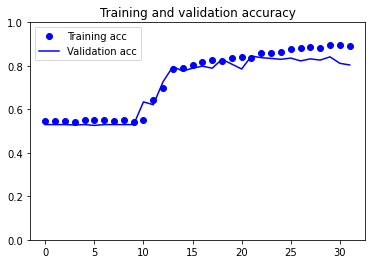

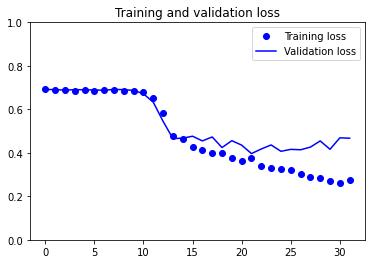

[0 1]
Normalized confusion matrix


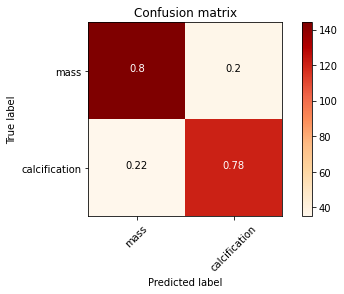

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models


model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1), padding='same'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(2, activation='softmax'))

model1.summary()

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# bad result
#earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)
earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model1.fit(trainingSet, trainingLabelsCategorical, epochs=100, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

pred = model1.predict_classes(testSet)
print(metrics.classification_report(testLabels, pred))
test_loss, test_acc = model1.evaluate(testSet, testLabelsCategorical)
print(test_loss, test_acc)
plot_accurancy_loss(history)
plot_confusionMatrix(model1, testSet, testLabels, ['mass', 'calcification'])

# **TEST 2**

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 128)      

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       179
           1       0.86      0.82      0.84       157

    accuracy                           0.85       336
   macro avg       0.85      0.85      0.85       336
weighted avg       0.85      0.85      0.85       336

11/11 [==============================] - 1s 44ms/step - loss: 0.3996 - accuracy: 0.8512
0.3996342718601227 0.851190447807312


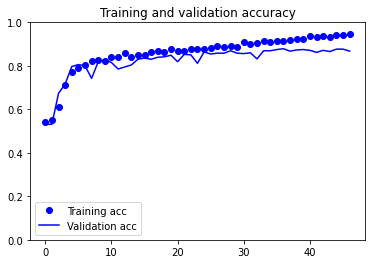

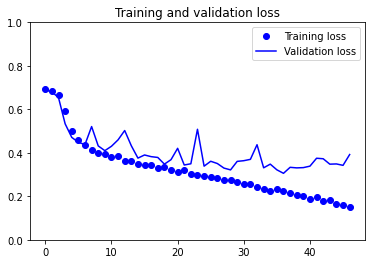

[0 1]
Normalized confusion matrix


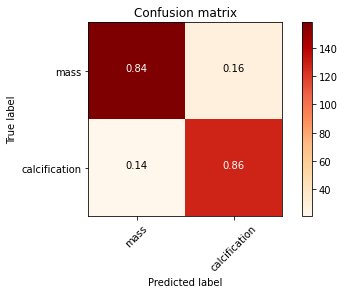

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
import tensorflow as tf
from keras import optimizers

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1), padding='same'))
model2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(2, activation='sigmoid'))

model2.summary()

model2.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model2.fit(trainingSet, trainingLabelsCategorical, epochs=100, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

pred = model2.predict_classes(testSet)
print(metrics.classification_report(testLabels, pred))
test_loss, test_acc = model2.evaluate(testSet, testLabelsCategorical)
print(test_loss, test_acc)
plot_accurancy_loss(history)
plot_confusionMatrix(model2, testSet, testLabels, ['mass', 'calcification'])

#**Test 3**
##**Improve the prevoius model**

In order to build a more generalized model, we inserted a drop-out layer between each convolutional layer and max-pooling layer.

Its rate is equal to 0.15, means that 1 neuron every 4 will not be randomly updated.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
dropout (Dropout)            (None, 150, 150, 64)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 64)       

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.81      0.91      0.85       179
           1       0.87      0.75      0.81       157

    accuracy                           0.83       336
   macro avg       0.84      0.83      0.83       336
weighted avg       0.84      0.83      0.83       336

11/11 [==============================] - 1s 44ms/step - loss: 0.3807 - accuracy: 0.8333
0.3806851804256439 0.8333333134651184


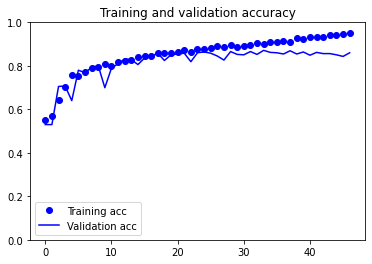

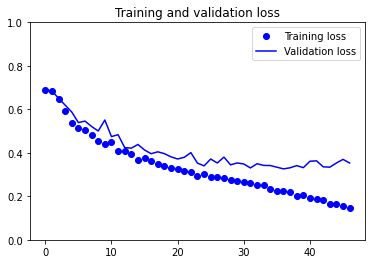

[0 1]
Normalized confusion matrix


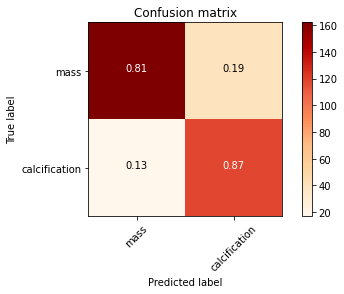

In [ ]:
tf.random.set_seed(18)



from tensorflow.keras import layers
from tensorflow.keras import models
import tensorflow as tf
from keras import optimizers

modelDropout = models.Sequential()
modelDropout.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1), padding='same'))
modelDropout.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
modelDropout.add(layers.Dropout(rate=.15))
modelDropout.add(layers.MaxPooling2D((2, 2)))
modelDropout.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
modelDropout.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
modelDropout.add(layers.Dropout(rate=.15))
modelDropout.add(layers.MaxPooling2D((2, 2)))
modelDropout.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
modelDropout.add(layers.Dropout(rate=.15))
modelDropout.add(layers.MaxPooling2D((2, 2)))
modelDropout.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
modelDropout.add(layers.Dropout(rate=.15))
modelDropout.add(layers.MaxPooling2D((2, 2)))

modelDropout.add(layers.Flatten())
modelDropout.add(layers.Dense(256, activation='relu'))
modelDropout.add(layers.Dense(2, activation='sigmoid'))

modelDropout.summary()

modelDropout.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = modelDropout.fit(trainingSet, trainingLabelsCategorical, epochs=100, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

pred = modelDropout.predict_classes(testSet)
print(metrics.classification_report(testLabels, pred))
test_loss, test_acc = modelDropout.evaluate(testSet, testLabelsCategorical)
print(test_loss, test_acc)
plot_accurancy_loss(history)
plot_confusionMatrix(modelDropout, testSet, testLabels, ['mass', 'calcification'])

# **TEST 4**

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 37, 37, 128)      

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.80      0.92      0.86       179
           1       0.89      0.74      0.81       157

    accuracy                           0.84       336
   macro avg       0.85      0.83      0.83       336
weighted avg       0.84      0.84      0.83       336

11/11 [==============================] - 1s 44ms/step - loss: 0.3909 - accuracy: 0.8363
0.39086592197418213 0.836309552192688


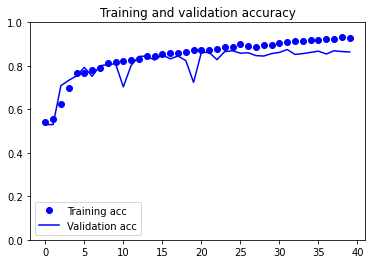

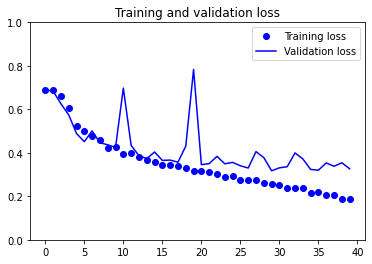

[0 1]
Normalized confusion matrix


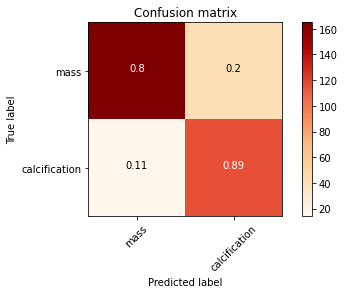

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
import tensorflow as tf
from keras import optimizers

model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1), padding='same'))
model3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(2, activation='sigmoid'))

model3.summary()

model3.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model3.fit(trainingSet, trainingLabelsCategorical, epochs=100, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

pred = model3.predict_classes(testSet)
print(metrics.classification_report(testLabels, pred))
test_loss, test_acc = model3.evaluate(testSet, testLabelsCategorical)
print(test_loss, test_acc)
plot_accurancy_loss(history)
plot_confusionMatrix(model3, testSet, testLabels, ['mass', 'calcification'])

# **TEST 5**

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 37, 37, 128)      

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.81      0.89      0.85       179
           1       0.86      0.76      0.81       157

    accuracy                           0.83       336
   macro avg       0.84      0.83      0.83       336
weighted avg       0.84      0.83      0.83       336

11/11 [==============================] - 0s 44ms/step - loss: 0.4027 - accuracy: 0.8333
0.40265536308288574 0.8333333134651184


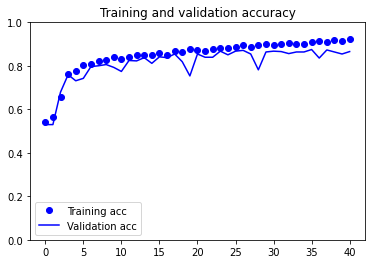

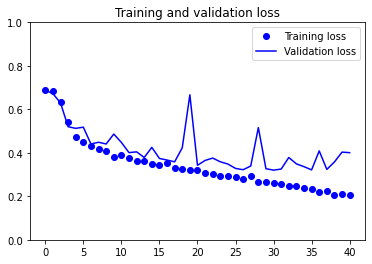

[0 1]
Normalized confusion matrix


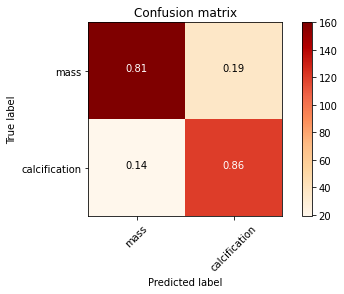

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
import tensorflow as tf
from keras import optimizers

model5 = models.Sequential()
model5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1), padding='same'))
model5.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model5.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Flatten())
model5.add(layers.Dense(256, activation='relu'))
model5.add(layers.Dense(2, activation='softmax'))

model5.summary()

model5.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model5.fit(trainingSet, trainingLabelsCategorical, epochs=100, callbacks=[earlyStopCallback], batch_size=32, validation_split=0.2)

pred = model5.predict_classes(testSet)
print(metrics.classification_report(testLabels, pred))
test_loss, test_acc = model5.evaluate(testSet, testLabelsCategorical)
print(test_loss, test_acc)
plot_accurancy_loss(history)
plot_confusionMatrix(model5, testSet, testLabels, ['mass', 'calcification'])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 202

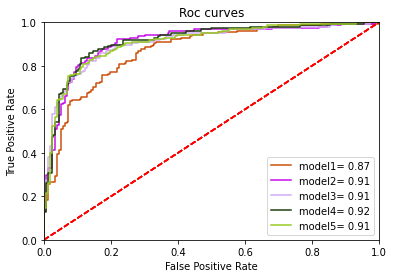

In [ ]:
models = [model1, model2, modelDropout, model3, model5]

plotRocCurves(models, testSet, testLabels, ['model1', 'model2', 'model3', 'model4', 'model5'])

Save best models

In [ ]:
modelDropout.save(os.path.join(projectPath + dir_name,"model1.h5"))
model3.save(os.path.join(projectPath + dir_name,"model2.h5"))
model5.save(os.path.join(projectPath + dir_name,"model3.h5"))